In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pprint
import pyspark
import pyspark.sql.functions as F

from pyspark.sql.functions import col
from pyspark.sql.types import StringType, IntegerType, FloatType, DateType

import utils.data_processing_bronze_table
import utils.data_processing_silver_table
import utils.data_processing_gold_table


## set up pyspark session

In [2]:
# Initialize SparkSession
spark = pyspark.sql.SparkSession.builder \
    .appName("dev") \
    .master("local[*]") \
    .getOrCreate()

# Set log level to ERROR to hide warnings
spark.sparkContext.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/06 10:10:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


## set up config

In [3]:
# set up config
snapshot_date_str = "2023-01-01"

start_date_str = "2023-01-01"
end_date_str = "2024-12-01"

In [4]:
# generate list of dates to process
def generate_first_of_month_dates(start_date_str, end_date_str):
    # Convert the date strings to datetime objects
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")
    
    # List to store the first of month dates
    first_of_month_dates = []

    # Start from the first of the month of the start_date
    current_date = datetime(start_date.year, start_date.month, 1)

    while current_date <= end_date:
        # Append the date in yyyy-mm-dd format
        first_of_month_dates.append(current_date.strftime("%Y-%m-%d"))
        
        # Move to the first of the next month
        if current_date.month == 12:
            current_date = datetime(current_date.year + 1, 1, 1)
        else:
            current_date = datetime(current_date.year, current_date.month + 1, 1)

    return first_of_month_dates

dates_str_lst = generate_first_of_month_dates(start_date_str, end_date_str)
dates_str_lst

['2023-01-01',
 '2023-02-01',
 '2023-03-01',
 '2023-04-01',
 '2023-05-01',
 '2023-06-01',
 '2023-07-01',
 '2023-08-01',
 '2023-09-01',
 '2023-10-01',
 '2023-11-01',
 '2023-12-01',
 '2024-01-01',
 '2024-02-01',
 '2024-03-01',
 '2024-04-01',
 '2024-05-01',
 '2024-06-01',
 '2024-07-01',
 '2024-08-01',
 '2024-09-01',
 '2024-10-01',
 '2024-11-01',
 '2024-12-01']

## Build Bronze Table

In [5]:
# create bronze datalake
bronze_lms_directory = "datamart/bronze/lms/"

if not os.path.exists(bronze_lms_directory):
    os.makedirs(bronze_lms_directory)

In [6]:
# run bronze backfill
for date_str in dates_str_lst:
    utils.data_processing_bronze_table.process_bronze_table(date_str, bronze_lms_directory, spark)


2023-01-01row count: 530
saved to: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv


2023-02-01row count: 1031
saved to: datamart/bronze/lms/bronze_loan_daily_2023_02_01.csv
2023-03-01row count: 1537
saved to: datamart/bronze/lms/bronze_loan_daily_2023_03_01.csv
2023-04-01row count: 2047
saved to: datamart/bronze/lms/bronze_loan_daily_2023_04_01.csv
2023-05-01row count: 2568
saved to: datamart/bronze/lms/bronze_loan_daily_2023_05_01.csv
2023-06-01row count: 3085
saved to: datamart/bronze/lms/bronze_loan_daily_2023_06_01.csv
2023-07-01row count: 3556
saved to: datamart/bronze/lms/bronze_loan_daily_2023_07_01.csv
2023-08-01row count: 4037
saved to: datamart/bronze/lms/bronze_loan_daily_2023_08_01.csv
2023-09-01row count: 4491


saved to: datamart/bronze/lms/bronze_loan_daily_2023_09_01.csv
2023-10-01row count: 4978
saved to: datamart/bronze/lms/bronze_loan_daily_2023_10_01.csv
2023-11-01row count: 5469
saved to: datamart/bronze/lms/bronze_loan_daily_2023_11_01.csv
2023-12-01row count: 5428
saved to: datamart/bronze/lms/bronze_loan_daily_2023_12_01.csv
2024-01-01row count: 5412
saved to: datamart/bronze/lms/bronze_loan_daily_2024_01_01.csv
2024-02-01row count: 5424
saved to: datamart/bronze/lms/bronze_loan_daily_2024_02_01.csv
2024-03-01row count: 5425
saved to: datamart/bronze/lms/bronze_loan_daily_2024_03_01.csv
2024-04-01row count: 5417
saved to: datamart/bronze/lms/bronze_loan_daily_2024_04_01.csv
2024-05-01row count: 5391
saved to: datamart/bronze/lms/bronze_loan_daily_2024_05_01.csv
2024-06-01row count: 5418


saved to: datamart/bronze/lms/bronze_loan_daily_2024_06_01.csv
2024-07-01row count: 5442
saved to: datamart/bronze/lms/bronze_loan_daily_2024_07_01.csv
2024-08-01row count: 5531
saved to: datamart/bronze/lms/bronze_loan_daily_2024_08_01.csv
2024-09-01row count: 5537
saved to: datamart/bronze/lms/bronze_loan_daily_2024_09_01.csv
2024-10-01row count: 5502
saved to: datamart/bronze/lms/bronze_loan_daily_2024_10_01.csv
2024-11-01row count: 5501
saved to: datamart/bronze/lms/bronze_loan_daily_2024_11_01.csv
2024-12-01row count: 5531
saved to: datamart/bronze/lms/bronze_loan_daily_2024_12_01.csv


In [7]:
# inspect output
utils.data_processing_bronze_table.process_bronze_table(date_str, bronze_lms_directory, spark).toPandas()

2024-12-01row count: 5531
saved to: datamart/bronze/lms/bronze_loan_daily_2024_12_01.csv


,loan_id,Customer_ID,loan_start_date,tenure,installment_num,loan_amt,due_amt,paid_amt,overdue_amt,balance,snapshot_date
0,CUS_0x100b_2024_03_01,CUS_0x100b,2024-03-01,10,9,10000,1000.0,1000.0,0.0,1000.0,2024-12-01
1,CUS_0x102e_2024_04_01,CUS_0x102e,2024-04-01,10,8,10000,1000.0,0.0,6000.0,8000.0,2024-12-01
2,CUS_0x1038_2024_10_01,CUS_0x1038,2024-10-01,10,2,10000,1000.0,1000.0,0.0,8000.0,2024-12-01
3,CUS_0x103e_2024_12_01,CUS_0x103e,2024-12-01,10,0,10000,0.0,0.0,0.0,10000.0,2024-12-01
4,CUS_0x1048_2024_02_01,CUS_0x1048,2024-02-01,10,10,10000,1000.0,0.0,9000.0,9000.0,2024-12-01
...,...,...,...,...,...,...,...,...,...,...,...
5526,CUS_0xfe3_2024_04_01,CUS_0xfe3,2024-04-01,10,8,10000,1000.0,1000.0,0.0,2000.0,2024-12-01
5527,CUS_0xff3_2024_06_01,CUS_0xff3,2024-06-01,10,6,10000,1000.0,1000.0,0.0,4000.0,2024-12-01
5528,CUS_0xff4_2024_12_01,CUS_0xff4,2024-12-01,10,0,10000,0.0,0.0,0.0,10000.0,2024-12-01
5529,CUS_0xff6_2024_10_01,CUS_0xff6,2024-10-01,10,2,10000,1000.0,1000.0,0.0,8000.0,2024-12-01


## Build Silver Table

In [8]:
# create bronze datalake
silver_loan_daily_directory = "datamart/silver/loan_daily/"

if not os.path.exists(silver_loan_daily_directory):
    os.makedirs(silver_loan_daily_directory)

In [9]:
# run silver backfill
for date_str in dates_str_lst:
    utils.data_processing_silver_table.process_silver_table(date_str, bronze_lms_directory, silver_loan_daily_directory, spark)


loaded from: datamart/bronze/lms/bronze_loan_daily_2023_01_01.csv row count: 530


saved to: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_02_01.csv row count: 1031
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_02_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_03_01.csv row count: 1537
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_03_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_04_01.csv row count: 2047
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_04_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_05_01.csv row count: 2568
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_05_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_06_01.csv row count: 3085
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_06_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2023_07_01.csv row count: 3556
saved to: datamart/silver/loan_daily/silver_loan_daily_2023_07_0

saved to: datamart/silver/loan_daily/silver_loan_daily_2024_10_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_11_01.csv row count: 5501
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_11_01.parquet
loaded from: datamart/bronze/lms/bronze_loan_daily_2024_12_01.csv row count: 5531
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_12_01.parquet


In [10]:
utils.data_processing_silver_table.process_silver_table(date_str, bronze_lms_directory, silver_loan_daily_directory, spark).toPandas()

loaded from: datamart/bronze/lms/bronze_loan_daily_2024_12_01.csv row count: 5531
saved to: datamart/silver/loan_daily/silver_loan_daily_2024_12_01.parquet


,loan_id,Customer_ID,loan_start_date,tenure,installment_num,loan_amt,due_amt,paid_amt,overdue_amt,balance,snapshot_date,mob,installments_missed,first_missed_date,dpd
0,CUS_0x100b_2024_03_01,CUS_0x100b,2024-03-01,10,9,10000.0,1000.0,1000.0,0.0,1000.0,2024-12-01,9,0,None,0
1,CUS_0x102e_2024_04_01,CUS_0x102e,2024-04-01,10,8,10000.0,1000.0,0.0,6000.0,8000.0,2024-12-01,8,6,2024-06-01,183
2,CUS_0x1038_2024_10_01,CUS_0x1038,2024-10-01,10,2,10000.0,1000.0,1000.0,0.0,8000.0,2024-12-01,2,0,None,0
3,CUS_0x103e_2024_12_01,CUS_0x103e,2024-12-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2024-12-01,0,0,None,0
4,CUS_0x1048_2024_02_01,CUS_0x1048,2024-02-01,10,10,10000.0,1000.0,0.0,9000.0,9000.0,2024-12-01,10,9,2024-03-01,275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5526,CUS_0xfe3_2024_04_01,CUS_0xfe3,2024-04-01,10,8,10000.0,1000.0,1000.0,0.0,2000.0,2024-12-01,8,0,None,0
5527,CUS_0xff3_2024_06_01,CUS_0xff3,2024-06-01,10,6,10000.0,1000.0,1000.0,0.0,4000.0,2024-12-01,6,0,None,0
5528,CUS_0xff4_2024_12_01,CUS_0xff4,2024-12-01,10,0,10000.0,0.0,0.0,0.0,10000.0,2024-12-01,0,0,None,0
5529,CUS_0xff6_2024_10_01,CUS_0xff6,2024-10-01,10,2,10000.0,1000.0,1000.0,0.0,8000.0,2024-12-01,2,0,None,0


## EDA on credit labels

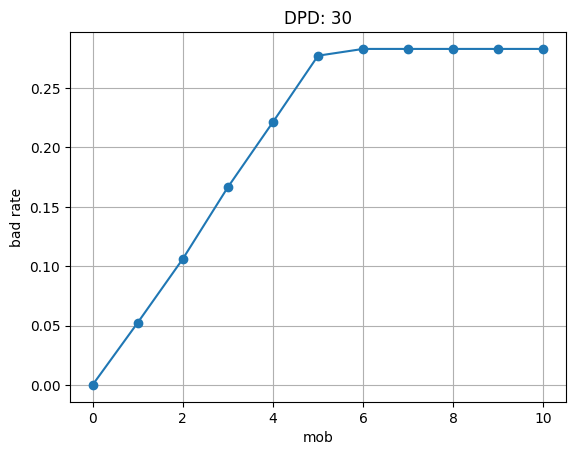

In [11]:
# set dpd label definition
dpd = 30

# Path to the folder containing CSV files
folder_path = silver_loan_daily_directory

# Read all CSV files into a single DataFrame
files_list = [folder_path+os.path.basename(f) for f in glob.glob(os.path.join(folder_path, '*'))]
df = spark.read.option("header", "true").parquet(*files_list)

# filter only completed loans
df = df.filter(col("loan_start_date") < datetime.strptime("2024-01-01", "%Y-%m-%d"))

# create dpd flag if more than dpd
df = df.withColumn("dpd_flag", F.when(col("dpd") >= dpd, 1).otherwise(0))

# actual bads 
actual_bads_df = df.filter(col("installment_num") == 10)

# prepare for analysis
# df = df.filter(col("installment_num") < 10)

# visualise bad rate
pdf = df.toPandas()

# Group by col_A and count occurrences in col_B
grouped = pdf.groupby('mob')['dpd_flag'].mean()

# Sort the index (x-axis) of the grouped DataFrame
grouped = grouped.sort_index()

# Plotting
grouped.plot(kind='line', marker='o')

plt.title('DPD: '+ str(dpd))
plt.xlabel('mob')
plt.ylabel('bad rate')
plt.grid(True)
plt.show()


In [12]:
df.show()

+--------------------+-----------+---------------+------+---------------+--------+-------+--------+-----------+-------+-------------+---+-------------------+-----------------+---+--------+
|             loan_id|Customer_ID|loan_start_date|tenure|installment_num|loan_amt|due_amt|paid_amt|overdue_amt|balance|snapshot_date|mob|installments_missed|first_missed_date|dpd|dpd_flag|
+--------------------+-----------+---------------+------+---------------+--------+-------+--------+-----------+-------+-------------+---+-------------------+-----------------+---+--------+
|CUS_0x1011_2023_1...| CUS_0x1011|     2023-11-01|    10|             10| 10000.0| 1000.0|  1000.0|        0.0|    0.0|   2024-09-01| 10|                  0|             NULL|  0|       0|
|CUS_0x1013_2023_1...| CUS_0x1013|     2023-12-01|    10|              9| 10000.0| 1000.0|  1000.0|        0.0| 1000.0|   2024-09-01|  9|                  0|             NULL|  0|       0|
|CUS_0x1018_2023_1...| CUS_0x1018|     2023-11-01|    1

## Build gold table for labels

In [13]:
# create bronze datalake
gold_label_store_directory = "datamart/gold/label_store/"

if not os.path.exists(gold_label_store_directory):
    os.makedirs(gold_label_store_directory)

In [14]:
# run gold backfill
for date_str in dates_str_lst:
    utils.data_processing_gold_table.process_labels_gold_table(date_str, silver_loan_daily_directory, gold_label_store_directory, spark, dpd = 30, mob = 6)


loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_01_01.parquet row count: 530
saved to: datamart/gold/label_store/gold_label_store_2023_01_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_02_01.parquet row count: 1031
saved to: datamart/gold/label_store/gold_label_store_2023_02_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_03_01.parquet row count: 1537
saved to: datamart/gold/label_store/gold_label_store_2023_03_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_04_01.parquet row count: 2047
saved to: datamart/gold/label_store/gold_label_store_2023_04_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_05_01.parquet row count: 2568
saved to: datamart/gold/label_store/gold_label_store_2023_05_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_06_01.parquet row count: 3085
saved to: datamart/gold/label_store/gold_label_store_2023_06_01.parquet
loaded from

saved to: datamart/gold/label_store/gold_label_store_2023_09_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_10_01.parquet row count: 4978
saved to: datamart/gold/label_store/gold_label_store_2023_10_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_11_01.parquet row count: 5469


saved to: datamart/gold/label_store/gold_label_store_2023_11_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2023_12_01.parquet row count: 5428


saved to: datamart/gold/label_store/gold_label_store_2023_12_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_01_01.parquet row count: 5412
saved to: datamart/gold/label_store/gold_label_store_2024_01_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_02_01.parquet row count: 5424
saved to: datamart/gold/label_store/gold_label_store_2024_02_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_03_01.parquet row count: 5425
saved to: datamart/gold/label_store/gold_label_store_2024_03_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_04_01.parquet row count: 5417
saved to: datamart/gold/label_store/gold_label_store_2024_04_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_05_01.parquet row count: 5391
saved to: datamart/gold/label_store/gold_label_store_2024_05_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_06_01.parquet row count: 5418
saved to: 

saved to: datamart/gold/label_store/gold_label_store_2024_07_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_08_01.parquet row count: 5531
saved to: datamart/gold/label_store/gold_label_store_2024_08_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_09_01.parquet row count: 5537
saved to: datamart/gold/label_store/gold_label_store_2024_09_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_10_01.parquet row count: 5502
saved to: datamart/gold/label_store/gold_label_store_2024_10_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_11_01.parquet row count: 5501
saved to: datamart/gold/label_store/gold_label_store_2024_11_01.parquet
loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_12_01.parquet row count: 5531


saved to: datamart/gold/label_store/gold_label_store_2024_12_01.parquet


In [15]:
utils.data_processing_gold_table.process_labels_gold_table(date_str, silver_loan_daily_directory, gold_label_store_directory, spark, dpd = 30, mob = 6).dtypes


loaded from: datamart/silver/loan_daily/silver_loan_daily_2024_12_01.parquet row count: 5531
saved to: datamart/gold/label_store/gold_label_store_2024_12_01.parquet


[('loan_id', 'string'),
 ('Customer_ID', 'string'),
 ('label', 'int'),
 ('label_def', 'string'),
 ('snapshot_date', 'date')]

## inspect label store

In [16]:
folder_path = gold_label_store_directory
files_list = [folder_path+os.path.basename(f) for f in glob.glob(os.path.join(folder_path, '*'))]
df = spark.read.option("header", "true").parquet(*files_list)
print("row_count:",df.count())

df.show()

row_count: 8974
+--------------------+-----------+-----+----------+-------------+
|             loan_id|Customer_ID|label| label_def|snapshot_date|
+--------------------+-----------+-----+----------+-------------+
|CUS_0x1037_2023_0...| CUS_0x1037|    0|30dpd_6mob|   2023-07-01|
|CUS_0x1069_2023_0...| CUS_0x1069|    0|30dpd_6mob|   2023-07-01|
|CUS_0x114a_2023_0...| CUS_0x114a|    0|30dpd_6mob|   2023-07-01|
|CUS_0x1184_2023_0...| CUS_0x1184|    0|30dpd_6mob|   2023-07-01|
|CUS_0x1297_2023_0...| CUS_0x1297|    1|30dpd_6mob|   2023-07-01|
|CUS_0x12fb_2023_0...| CUS_0x12fb|    0|30dpd_6mob|   2023-07-01|
|CUS_0x1325_2023_0...| CUS_0x1325|    0|30dpd_6mob|   2023-07-01|
|CUS_0x1341_2023_0...| CUS_0x1341|    0|30dpd_6mob|   2023-07-01|
|CUS_0x1375_2023_0...| CUS_0x1375|    1|30dpd_6mob|   2023-07-01|
|CUS_0x13a8_2023_0...| CUS_0x13a8|    0|30dpd_6mob|   2023-07-01|
|CUS_0x13ef_2023_0...| CUS_0x13ef|    0|30dpd_6mob|   2023-07-01|
|CUS_0x1440_2023_0...| CUS_0x1440|    0|30dpd_6mob|   2023-0

In [17]:
df.printSchema()

root
 |-- loan_id: string (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- label: integer (nullable = true)
 |-- label_def: string (nullable = true)
 |-- snapshot_date: date (nullable = true)



In [18]:
#Feature Cleaning

In [19]:
# Clickstream features
feature_clickstream_df = spark.read.option("header", True).csv("data/feature_clickstream.csv")

# Customer attributes
features_attributes_df = spark.read.option("header", True).csv("data/features_attributes.csv")

# Financial features
features_financials_df = spark.read.option("header", True).csv("data/features_financials.csv")


In [20]:
import os
import pandas as pd
import numpy as np
from pyspark.sql import functions as F
from pyspark.sql.types import *

class FeatureEDA:
    """
    filter + EDA
    """
    
    def __init__(self, spark):
        self.spark = spark
        
    def load_features(self, data_folder):
        """
        load
        """
        print("="*80)
        print("STEP 1: Loading Feature Datasets")
        print("="*80)
        
        # clickstream
        clickstream_path = os.path.join(data_folder, "feature_clickstream.csv")
        print(f"\nLoading: {clickstream_path}")
        df_click = self.spark.read.option("header", "true").csv(clickstream_path)
        df_click = df_click.withColumn("snapshot_date", 
                                       F.to_date(F.col("snapshot_date"), "yyyy/M/d"))
        print(f"  ✓ Clickstream: {df_click.count()} rows, {len(df_click.columns)} columns")
        print(f"  Columns: {df_click.columns}")
        
        # attributes
        attributes_path = os.path.join(data_folder, "features_attributes.csv")
        print(f"\nLoading: {attributes_path}")
        df_attr = self.spark.read.option("header", "true").csv(attributes_path)
        df_attr = df_attr.withColumn("snapshot_date", 
                                     F.to_date(F.col("snapshot_date"), "yyyy/M/d"))
        print(f"  ✓ Attributes: {df_attr.count()} rows, {len(df_attr.columns)} columns")
        print(f"  Columns: {df_attr.columns}")
        
        # financials
        financials_path = os.path.join(data_folder, "features_financials.csv")
        print(f"\nLoading: {financials_path}")
        df_fin = self.spark.read.option("header", "true").csv(financials_path)
        df_fin = df_fin.withColumn("snapshot_date", 
                                   F.to_date(F.col("snapshot_date"), "yyyy/M/d"))
        print(f"  ✓ Financials: {df_fin.count()} rows, {len(df_fin.columns)} columns")
        print(f"  Columns: {df_fin.columns}")
        
        return df_click, df_attr, df_fin
    
    def define_feature_categories(self, df_click, df_attr, df_fin):
        """
        Classify
        """
        print("\n" + "="*80)
        print("STEP 2: Categorizing Features by Business Logic")
        print("="*80)
        
       
        feature_categories = {
            '❌ EXCLUDE - Identity/Name': [
                'Name', 'SSN' 
            ],
            
            '❌ EXCLUDE - Data Leakage': [
                'Num_of_Delayed_Payment',  
                'Delay_from_due_date',     
                'Payment_of_Min_Amount',    
            ],
            
            '✅ KEEP - Demographic': [
                'Age',          
                'Occupation',   
            ],
            
            '✅ KEEP - Financial Capacity': [
                'Annual_Income',           
                'Monthly_Inhand_Salary',   
                'Monthly_Balance',         
                'Amount_invested_monthly', 
            ],
            
            '✅ KEEP - Credit Behavior': [
                'Num_Bank_Accounts',      
                'Num_Credit_Card',       
                'Interest_Rate',          
                'Num_of_Loan',            
                'Type_of_Loan',           
                'Changed_Credit_Limit',   
                'Num_Credit_Inquiries',  
                'Credit_Mix',            
                'Outstanding_Debt',       
                'Credit_Utilization_Ratio', 
                'Credit_History_Age',     
            ],
            
            '✅ KEEP - Payment Behavior': [
                'Total_EMI_per_month',    
                'Payment_Behaviour',       
            ],
            
            '✅ KEEP - Clickstream': []  
        }
        
        # clickstream
        clickstream_features = [col for col in df_click.columns 
                               if col.startswith('fe_')]
        feature_categories['✅ KEEP - Clickstream'] = clickstream_features
        
        
        keep_features = []
        exclude_features = []
        
        print("\n📋 Feature Categories:")
        for category, features in feature_categories.items():
            print(f"\n{category} ({len(features)} features):")
            for feat in features:
                print(f"  - {feat}")
            
            if category.startswith('✅'):
                keep_features.extend(features)
            else:
                exclude_features.extend(features)
        
        print(f"\n{'='*80}")
        print(f"✅ Total features to KEEP: {len(keep_features)}")
        print(f"❌ Total features to EXCLUDE: {len(exclude_features)}")
        print(f"{'='*80}")
        
        return keep_features, exclude_features, feature_categories
    
    def comprehensive_eda(self, df_click, df_attr, df_fin, keep_features):
        """
        EDA
        """
        print("\n" + "="*80)
        print("STEP 3: Comprehensive EDA for Selected Features")
        print("="*80)
        
        eda_results = {}
        
        
        all_dfs = {
            'clickstream': df_click,
            'attributes': df_attr,
            'financials': df_fin
        }
        
        for dataset_name, df in all_dfs.items():
            print(f"\n{'='*80}")
            print(f"📊 Analyzing {dataset_name.upper()}")
            print(f"{'='*80}")
            
            
            dataset_features = [col for col in df.columns 
                              if col in keep_features]
            
            if len(dataset_features) == 0:
                print(f"  No features to analyze in this dataset")
                continue
            
            dataset_results = []
            
            for idx, col in enumerate(dataset_features, 1):
                print(f"\n[{idx}/{len(dataset_features)}] {col}")
                print("-" * 60)
                
                feature_info = {
                    'feature_name': col,
                    'dataset': dataset_name
                }
                
                
                total = df.count()
                null_count = df.filter(F.col(col).isNull() | (F.col(col) == "")).count()
                null_rate = (null_count / total) * 100
                unique_count = df.select(col).distinct().count()
                
                feature_info['total_records'] = total
                feature_info['null_count'] = null_count
                feature_info['null_rate'] = f"{null_rate:.2f}%"
                feature_info['unique_count'] = unique_count
                
               
                samples = df.select(col).limit(10).toPandas()[col].tolist()
                feature_info['sample_values'] = samples
                
                print(f"  Total records: {total:,}")
                print(f"  Missing: {null_count:,} ({null_rate:.2f}%)")
                print(f"  Unique values: {unique_count:,}")
                print(f"  Sample values: {samples[:5]}")
                
               
                if len(samples) > 0:
                    sample_non_null = df.filter(F.col(col).isNotNull() & (F.col(col) != "")) \
                                       .select(col).limit(100).toPandas()[col]
                    
                    if len(sample_non_null) > 0:
                       
                        cleaned = sample_non_null.astype(str).str.replace('[^0-9.-]', '', regex=True)
                        numeric_count = cleaned.str.match(r'^-?\d*\.?\d+$').sum()
                        is_numeric = (numeric_count / len(sample_non_null)) > 0.7
                        
                        if is_numeric:
                            feature_info['data_type'] = 'numeric'
                            
                            
                            df_clean = df.withColumn(
                                f"{col}_clean",
                                F.regexp_replace(F.col(col), "[^0-9.-]", "")
                            )
                            df_clean = df_clean.withColumn(
                                f"{col}_clean",
                                F.when(F.col(f"{col}_clean").rlike("^-?[0-9]*\\.?[0-9]+$"), 
                                      F.col(f"{col}_clean").cast(DoubleType()))
                                .otherwise(None)
                            )
                            
                            stats = df_clean.select(
                                F.min(f"{col}_clean").alias('min'),
                                F.max(f"{col}_clean").alias('max'),
                                F.mean(f"{col}_clean").alias('mean'),
                                F.stddev(f"{col}_clean").alias('stddev'),
                                F.expr(f"percentile_approx(`{col}_clean`, 0.25)").alias('q25'),
                                F.expr(f"percentile_approx(`{col}_clean`, 0.50)").alias('median'),
                                F.expr(f"percentile_approx(`{col}_clean`, 0.75)").alias('q75')
                            ).collect()[0]
                            
                            feature_info['statistics'] = {
                                'min': float(stats['min']) if stats['min'] is not None else None,
                                'max': float(stats['max']) if stats['max'] is not None else None,
                                'mean': float(stats['mean']) if stats['mean'] is not None else None,
                                'stddev': float(stats['stddev']) if stats['stddev'] is not None else None,
                                'q25': float(stats['q25']) if stats['q25'] is not None else None,
                                'median': float(stats['median']) if stats['median'] is not None else None,
                                'q75': float(stats['q75']) if stats['q75'] is not None else None
                            }
                            
                            print(f"  Type: NUMERIC")
                            if stats['min'] is not None:
                                print(f"    Min: {stats['min']:.2f}")
                                print(f"    Max: {stats['max']:.2f}")
                                print(f"    Mean: {stats['mean']:.2f}")
                                print(f"    Median: {stats['median']:.2f}")
                                print(f"    Std: {stats['stddev']:.2f}")
                                
                                
                                if null_rate > 30:
                                    print(f"  ⚠️  WARNING: High missing rate!")
                                if stats['stddev'] and stats['stddev'] < 0.01:
                                    print(f"  ⚠️  WARNING: Very low variance!")
                            
                        else:
                            feature_info['data_type'] = 'categorical'
                            
                           
                            top_values = df.groupBy(col).count() \
                                          .orderBy(F.desc("count")) \
                                          .limit(10) \
                                          .toPandas()
                            
                            feature_info['top_values'] = top_values.to_dict('records')
                            
                            print(f"  Type: CATEGORICAL")
                            print(f"  Top 10 values:")
                            for _, row in top_values.iterrows():
                                pct = (row['count'] / total) * 100
                                val = row[col] if row[col] else "[NULL/EMPTY]"
                                print(f"    {val}: {row['count']:,} ({pct:.1f}%)")
                            
                            
                            if unique_count > 100:
                                print(f"  ⚠️  WARNING: High cardinality!")
                            if null_rate > 30:
                                print(f"  ⚠️  WARNING: High missing rate!")
                
                dataset_results.append(feature_info)
            
            eda_results[dataset_name] = dataset_results
        
        return eda_results
    
    def generate_summary(self, eda_results, keep_features, exclude_features, feature_categories):
        """
        EDA report
        """
        print("\n" + "="*80)
        print("STEP 4: EDA Summary")
        print("="*80)
        
        
        all_features = []
        for dataset in eda_results.values():
            all_features.extend(dataset)
        
        numeric_features = [f for f in all_features if f.get('data_type') == 'numeric']
        categorical_features = [f for f in all_features if f.get('data_type') == 'categorical']
        
        print(f"\n📊 Feature Type Distribution:")
        print(f"  Total selected features: {len(keep_features)}")
        print(f"  Numeric features: {len(numeric_features)}")
        print(f"  Categorical features: {len(categorical_features)}")
        print(f"  Excluded features: {len(exclude_features)}")
        
        
        print(f"\n⚠️  Data Quality Issues:")
        high_missing = [f for f in all_features 
                       if float(f['null_rate'].rstrip('%')) > 30]
        print(f"  High missing rate (>30%): {len(high_missing)}")
        if high_missing:
            for f in high_missing:
                print(f"    - {f['feature_name']}: {f['null_rate']}")
        
        high_cardinality = [f for f in categorical_features 
                           if f['unique_count'] > 100]
        print(f"  High cardinality categorical (>100 unique): {len(high_cardinality)}")
        if high_cardinality:
            for f in high_cardinality:
                print(f"    - {f['feature_name']}: {f['unique_count']:,} unique values")
        
        
        print(f"\n📋 Feature Distribution by Category:")
        for category, features in feature_categories.items():
            if category.startswith('✅'):
                print(f"  {category}: {len(features)}")
        
        summary = {
            'total_selected': len(keep_features),
            'total_excluded': len(exclude_features),
            'numeric_count': len(numeric_features),
            'categorical_count': len(categorical_features),
            'high_missing_count': len(high_missing),
            'high_cardinality_count': len(high_cardinality),
            'feature_categories': feature_categories
        }
        
        return summary
    
    def save_results(self, keep_features, exclude_features, eda_results, summary):
        """
        save report
        """
        print("\n" + "="*80)
        print("STEP 5: Saving Results")
        print("="*80)
        
       
        with open("selected_features.txt", "w") as f:
            f.write("# Selected Features for Modeling\n")
            f.write(f"# Total: {len(keep_features)} features\n\n")
            for feat in keep_features:
                f.write(f"{feat}\n")
        print("✓ Saved: selected_features.txt")
        
        
        with open("excluded_features.txt", "w") as f:
            f.write("# Excluded Features\n")
            f.write(f"# Total: {len(exclude_features)} features\n\n")
            for feat in exclude_features:
                f.write(f"{feat}\n")
        print("✓ Saved: excluded_features.txt")
        
        #EDA report
        import json
        with open("eda_report.json", "w") as f:
            json.dump(eda_results, f, indent=2, default=str)
        print("✓ Saved: eda_report.json")
        
        
        with open("eda_summary.json", "w") as f:
            json.dump(summary, f, indent=2, default=str)
        print("✓ Saved: eda_summary.json")
        
        print("\n✅ All results saved successfully!")
    
    def run_pipeline(self, data_folder):
        """
        pipeline
        """
        # Step 1
        df_click, df_attr, df_fin = self.load_features(data_folder)
        
        # Step 2
        keep_features, exclude_features, feature_categories = \
            self.define_feature_categories(df_click, df_attr, df_fin)
        
        # Step 3
        eda_results = self.comprehensive_eda(df_click, df_attr, df_fin, keep_features)
        
        # Step 4
        summary = self.generate_summary(eda_results, keep_features, exclude_features, feature_categories)
        
        # Step 5
        self.save_results(keep_features, exclude_features, eda_results, summary)
        
        return keep_features, eda_results, summary



if __name__ == "__main__":
    

    analyzer = FeatureEDA(spark)
    

    keep_features, eda_results, summary = analyzer.run_pipeline(
        data_folder="data"
    )
    
    print("\n" + "="*80)
    print("🎉 Pipeline Completed!")
    print("="*80)
    print(f"\n📁 Generated Files:")
    print(f"  1. selected_features.txt - List of features to use")
    print(f"  2. excluded_features.txt - List of excluded features")
    print(f"  3. eda_report.json - Detailed EDA for each feature")
    print(f"  4. eda_summary.json - Summary statistics")

STEP 1: Loading Feature Datasets

Loading: data/feature_clickstream.csv
  ✓ Clickstream: 215376 rows, 22 columns
  Columns: ['fe_1', 'fe_2', 'fe_3', 'fe_4', 'fe_5', 'fe_6', 'fe_7', 'fe_8', 'fe_9', 'fe_10', 'fe_11', 'fe_12', 'fe_13', 'fe_14', 'fe_15', 'fe_16', 'fe_17', 'fe_18', 'fe_19', 'fe_20', 'Customer_ID', 'snapshot_date']

Loading: data/features_attributes.csv
  ✓ Attributes: 12500 rows, 6 columns
  Columns: ['Customer_ID', 'Name', 'Age', 'SSN', 'Occupation', 'snapshot_date']

Loading: data/features_financials.csv
  ✓ Financials: 12500 rows, 22 columns
  Columns: ['Customer_ID', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Mo

  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 763
  Sample values: ['63', '-108', '-13', '-85', '55']


  Type: NUMERIC
    Min: -378.00
    Max: 541.00
    Mean: 101.41
    Median: 102.00
    Std: 99.83

[2/20] fe_2
------------------------------------------------------------


  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 760
  Sample values: ['118', '182', '8', '45', '120']


  Type: NUMERIC
    Min: -356.00
    Max: 560.00
    Mean: 103.10
    Median: 103.00
    Std: 99.93

[3/20] fe_3
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 766
  Sample values: ['80', '123', '87', '200', '226']


  Type: NUMERIC
    Min: -399.00
    Max: 583.00
    Mean: 104.33
    Median: 104.00
    Std: 100.60

[4/20] fe_4
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 764
  Sample values: ['121', '4', '166', '89', '-86']


  Type: NUMERIC
    Min: -307.00
    Max: 562.00
    Mean: 105.65
    Median: 106.00
    Std: 100.33

[5/20] fe_5
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 764
  Sample values: ['55', '-56', '214', '128', '253']


  Type: NUMERIC
    Min: -343.00
    Max: 570.00
    Mean: 107.00
    Median: 107.00
    Std: 100.69

[6/20] fe_6
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 755
  Sample values: ['193', '27', '-98', '54', '97']
  Type: NUMERIC
    Min: -321.00
    Max: 565.00
    Mean: 103.24
    Median: 103.00
    Std: 100.27

[7/20] fe_7
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 778
  Sample values: ['111', '25', '215', '76', '107']


  Type: NUMERIC
    Min: -368.00
    Max: 537.00
    Mean: 107.07
    Median: 107.00
    Std: 100.32

[8/20] fe_8
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 768
  Sample values: ['112', '-6', '152', '51', '68']
  Type: NUMERIC
    Min: -361.00
    Max: 573.00
    Mean: 110.72
    Median: 111.00
    Std: 100.24

[9/20] fe_9
------------------------------------------------------------


  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 756
  Sample values: ['-101', '284', '129', '61', '103']


  Type: NUMERIC
    Min: -328.00
    Max: 577.00
    Mean: 114.41
    Median: 115.00
    Std: 100.19

[10/20] fe_10
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 773
  Sample values: ['83', '222', '139', '139', '126']
  Type: NUMERIC
    Min: -317.00
    Max: 537.00
    Mean: 117.78
    Median: 118.00
    Std: 100.81

[11/20] fe_11
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 770
  Sample values: ['164', '203', '14', '6', '34']


  Type: NUMERIC
    Min: -375.00
    Max: 613.00
    Mean: 99.62
    Median: 100.00
    Std: 100.34

[12/20] fe_12
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 762
  Sample values: ['105', '190', '203', '197', '12']
  Type: NUMERIC
    Min: -344.00
    Max: 550.00
    Mean: 99.82
    Median: 100.00
    Std: 100.59

[13/20] fe_13
------------------------------------------------------------


  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 777
  Sample values: ['-16', '-14', '26', '172', '76']


  Type: NUMERIC
    Min: -355.00
    Max: 530.00
    Mean: 100.42
    Median: 101.00
    Std: 100.88

[14/20] fe_14
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 775
  Sample values: ['-81', '-96', '86', '96', '43']


  Type: NUMERIC
    Min: -394.00
    Max: 583.00
    Mean: 100.03
    Median: 100.00
    Std: 101.07

[15/20] fe_15
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 777
  Sample values: ['-126', '200', '171', '174', '183']


  Type: NUMERIC
    Min: -351.00
    Max: 597.00
    Mean: 99.60
    Median: 100.00
    Std: 101.15

[16/20] fe_16
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 765
  Sample values: ['114', '35', '125', '163', '159']


  Type: NUMERIC
    Min: -342.00
    Max: 554.00
    Mean: 99.86
    Median: 100.00
    Std: 100.75

[17/20] fe_17
------------------------------------------------------------


  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 769
  Sample values: ['35', '130', '-130', '37', '-26']


  Type: NUMERIC
    Min: -329.00
    Max: 516.00
    Mean: 100.13
    Median: 100.00
    Std: 101.30

[18/20] fe_18
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 776
  Sample values: ['85', '94', '354', '207', '104']


  Type: NUMERIC
    Min: -344.00
    Max: 551.00
    Mean: 100.13
    Median: 100.00
    Std: 102.23

[19/20] fe_19
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 783
  Sample values: ['-73', '111', '17', '180', '118']
  Type: NUMERIC
    Min: -401.00
    Max: 560.00
    Mean: 100.34
    Median: 100.00
    Std: 102.67

[20/20] fe_20
------------------------------------------------------------
  Total records: 215,376
  Missing: 0 (0.00%)
  Unique values: 786
  Sample values: ['76', '75', '302', '118', '184']
  Type: NUMERIC
    Min: -354.00
    Max: 547.00
    Mean: 100.05
    Median: 100.00
    Std: 103.59

📊 Analyzing ATTRIBUTES

[1/2] Age
------------------------------------------------------------
  Total records: 12,500
  Missing: 0 (0.00%)
  Unique values: 301
  Sample values: ['18', '26', '19', '44', '44']
  Type: NUMERIC
    Min: -500.00
    Max: 8678.00
    Mean: 105.77
    Median: 33.00
    Std: 664.

In [21]:
import pandas as pd

feature_clickstream = pd.read_csv("data/feature_clickstream.csv")
features_attributes = pd.read_csv("data/features_attributes.csv")
features_financials = pd.read_csv("data/features_financials.csv")

print(feature_clickstream.columns)
print(features_attributes.columns)
print(features_financials.columns)


Index(['fe_1', 'fe_2', 'fe_3', 'fe_4', 'fe_5', 'fe_6', 'fe_7', 'fe_8', 'fe_9',
       'fe_10', 'fe_11', 'fe_12', 'fe_13', 'fe_14', 'fe_15', 'fe_16', 'fe_17',
       'fe_18', 'fe_19', 'fe_20', 'Customer_ID', 'snapshot_date'],
      dtype='object')
Index(['Customer_ID', 'Name', 'Age', 'SSN', 'Occupation', 'snapshot_date'], dtype='object')
Index(['Customer_ID', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'snapshot_date'],
      dtype='object')


In [22]:
#  features_attributes 
features_attributes_clean = features_attributes.drop(columns=['Name', 'SSN'], errors='ignore')

#  features_financials 
features_financials_clean = features_financials.drop(
    columns=['Num_of_Delayed_Payment', 'Delay_from_due_date', 'Payment_of_Min_Amount'], errors='ignore'
)

# feature_clickstream 
feature_clickstream_clean = feature_clickstream.copy()


In [ ]:
###Bronze to Silver

In [23]:
print(features_attributes_clean.columns)
print(features_financials_clean.columns)
print(feature_clickstream_clean.columns)


Index(['Customer_ID', 'Age', 'Occupation', 'snapshot_date'], dtype='object')
Index(['Customer_ID', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Payment_Behaviour', 'Monthly_Balance', 'snapshot_date'],
      dtype='object')
Index(['fe_1', 'fe_2', 'fe_3', 'fe_4', 'fe_5', 'fe_6', 'fe_7', 'fe_8', 'fe_9',
       'fe_10', 'fe_11', 'fe_12', 'fe_13', 'fe_14', 'fe_15', 'fe_16', 'fe_17',
       'fe_18', 'fe_19', 'fe_20', 'Customer_ID', 'snapshot_date'],
      dtype='object')


In [24]:
import re

# === Clean numeric-like strings before converting ===
numeric_cols = [
    "Monthly_Balance",
    "Annual_Income",
    "Monthly_Inhand_Salary",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Delay_from_due_date",
    "Num_of_Delayed_Payment",
    "Changed_Credit_Limit",
    "Num_Credit_Inquiries",
    "Outstanding_Debt",
    "Credit_Utilization_Ratio",
    "Total_EMI_per_month",
    "Amount_invested_monthly",
    "Age"  # from attributes
]

for col in numeric_cols:
    if col in features_financials_clean.columns:
        # remove underscores, commas, and any non-numeric characters except . and -
        features_financials_clean[col] = (
            features_financials_clean[col]
            .astype(str)
            .str.replace(r"[^0-9\.\-]", "", regex=True)
        )
        features_financials_clean[col] = pd.to_numeric(features_financials_clean[col], errors='coerce')

    elif col in features_attributes_clean.columns:
        features_attributes_clean[col] = (
            features_attributes_clean[col]
            .astype(str)
            .str.replace(r"[^0-9\.\-]", "", regex=True)
        )
        features_attributes_clean[col] = pd.to_numeric(features_attributes_clean[col], errors='coerce')

# === 1. Clean numeric columns ===

# Monthly_Balance: replace extreme negative values with median
median_balance = features_financials_clean['Monthly_Balance'].median()
features_financials_clean.loc[features_financials_clean['Monthly_Balance'] < -1e10, 'Monthly_Balance'] = median_balance

# Age: replace invalid values (<0 or >120) with median
median_age = features_attributes_clean['Age'][(features_attributes_clean['Age'] >= 0) & (features_attributes_clean['Age'] <= 120)].median()
features_attributes_clean.loc[(features_attributes_clean['Age'] < 0) | (features_attributes_clean['Age'] > 120), 'Age'] = median_age

# Annual_Income: clip using IQR
q1 = features_financials_clean['Annual_Income'].quantile(0.25)
q3 = features_financials_clean['Annual_Income'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
features_financials_clean['Annual_Income'] = features_financials_clean['Annual_Income'].clip(lower, upper)

# Num_Bank_Accounts: fix negative, clip extreme
median_accounts = features_financials_clean['Num_Bank_Accounts'][features_financials_clean['Num_Bank_Accounts'] >= 0].median()
features_financials_clean.loc[features_financials_clean['Num_Bank_Accounts'] < 0, 'Num_Bank_Accounts'] = median_accounts

q1 = features_financials_clean['Num_Bank_Accounts'].quantile(0.25)
q3 = features_financials_clean['Num_Bank_Accounts'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
features_financials_clean['Num_Bank_Accounts'] = features_financials_clean['Num_Bank_Accounts'].clip(lower, upper)

# === 2. Clean categorical columns ===

# Credit_Mix: replace "_" with "Unknown"
features_financials_clean['Credit_Mix'] = features_financials_clean['Credit_Mix'].replace("_", "Unknown")

# Payment_Behaviour: replace "!@9#%8" with "Unknown"
features_financials_clean['Payment_Behaviour'] = features_financials_clean['Payment_Behaviour'].replace("!@9#%8", "Unknown")

# Type_of_Loan: fill NaN with "Unknown"
features_financials_clean['Type_of_Loan'] = features_financials_clean['Type_of_Loan'].fillna("Unknown")

# Fill NaN with median after cleaning
features_financials_clean['Annual_Income'].fillna(
    features_financials_clean['Annual_Income'].median(), inplace=True
)


/tmp/ipykernel_15217/25681219.py:82: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_financials_clean['Annual_Income'].fillna(


In [25]:
# Check min & max after cleaning
print("Monthly_Balance:", features_financials_clean['Monthly_Balance'].min(), "→", features_financials_clean['Monthly_Balance'].max())
print("Age:", features_attributes_clean['Age'].min(), "→", features_attributes_clean['Age'].max())
print("Annual_Income:", features_financials_clean['Annual_Income'].min(), "→", features_financials_clean['Annual_Income'].max())
print("Num_Bank_Accounts:", features_financials_clean['Num_Bank_Accounts'].min(), "→", features_financials_clean['Num_Bank_Accounts'].max())


Monthly_Balance: 0.382557979 → 1463.792328
Age: 14 → 56
Annual_Income: 7005.93 → 152545.54624999998
Num_Bank_Accounts: 0 → 13


In [26]:
#check cat value

print(features_financials_clean['Credit_Mix'].unique())
print(features_financials_clean['Payment_Behaviour'].unique())


['Bad' 'Unknown' 'Good' 'Standard']
['High_spent_Medium_value_payments' 'High_spent_Small_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'Unknown' 'High_spent_Large_value_payments'
 'Low_spent_Large_value_payments']


In [27]:
features_financials_clean.sample(10)


,Customer_ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,snapshot_date
1113,CUS_0x226a,14128.680,884.390000,4,107,9,2,"Payday Loan, and Student Loan",14.32,4,Standard,314.56,38.694340,20 Years and 0 Months,12.076670,37.638830,Low_spent_Small_value_payments,328.723500,2023/5/1
5100,CUS_0x5d43,124296.270,10111.022500,5,2,10,4,"Auto Loan, Auto Loan, Auto Loan, and Debt Cons...",8.44,6,Good,333.21,25.765184,27 Years and 11 Months,397.686069,661.875056,High_spent_Small_value_payments,277.740051,2024/4/1
945,CUS_0x1f9e,24894.050,2371.504167,8,3,8,0,Unknown,2.30,5,Unknown,86.43,33.837493,33 Years and 7 Months,0.000000,139.636346,Low_spent_Small_value_payments,387.514071,2023/4/1
2609,CUS_0x3910,63661.600,5598.133333,3,5,16,2,"Student Loan, and Personal Loan",1.03,1,Standard,1167.20,30.282635,28 Years and 3 Months,69.435530,482.935693,Low_spent_Small_value_payments,297.442110,2023/5/1
7802,CUS_0x8536,144497.440,11084.395310,5,5,16,3,"Not Specified, Home Equity Loan, and Student Loan",3.67,4,Standard,50.13,28.150386,25 Years and 11 Months,921.686533,101.613523,High_spent_Large_value_payments,1127.103304,2023/5/1
2738,CUS_0x3b2b,22219.570,1687.630833,7,5,8,3,"Not Specified, Student Loan, and Credit-Builde...",13.23,13,Unknown,502.78,27.972757,5 Years and 10 Months,35.336481,37.552758,High_spent_Large_value_payments,335.873845,2023/5/1
8176,CUS_0x8a62,64427.300,5075.941667,3,4,5,2,"Debt Consolidation Loan, and Personal Loan",7.21,6,Good,1265.70,31.096643,16 Years and 2 Months,104.460342,416.832995,Low_spent_Large_value_payments,256.300829,2024/1/1
9170,CUS_0x994c,50063.360,3574.256592,5,7,9,4,"Auto Loan, Mortgage Loan, Student Loan, and No...",3.38,3,Standard,608.79,38.443301,24 Years and 4 Months,463.069688,119.178296,Low_spent_Medium_value_payments,424.436757,2024/1/1
3801,CUS_0x4a5d,15522.740,1330.561667,8,7,21,9,"Not Specified, Home Equity Loan, Payday Loan, ...",26.31,11,Unknown,4268.86,36.814988,1 Years and 9 Months,71.245515,10000.000000,Low_spent_Small_value_payments,300.091442,2024/3/1
2422,CUS_0x365b,9328.895,641.407917,7,7,15,7,"Not Specified, Payday Loan, Payday Loan, Credi...",2.03,14,Bad,2049.20,28.360776,17 Years and 6 Months,47.941864,0.000000,High_spent_Large_value_payments,250.030479,2023/2/1


In [28]:
features_attributes_clean.sample(10)

,Customer_ID,Age,Occupation,snapshot_date
7881,CUS_0x866d,42,Manager,2023-05-01
4965,CUS_0x5b57,32,Accountant,2023-12-01
2008,CUS_0x2f9b,25,Engineer,2024-03-01
11834,CUS_0xc050,26,Scientist,2024-07-01
10748,CUS_0xb057,48,Scientist,2024-04-01
7342,CUS_0x7e09,51,_______,2023-11-01
1645,CUS_0x2a67,44,Doctor,2024-11-01
4701,CUS_0x5735,44,_______,2024-07-01
3763,CUS_0x49b0,20,Mechanic,2024-07-01
12461,CUS_0xf6c,55,Writer,2024-02-01


In [29]:
import pandas as pd


# Step 1: Attributes + Financials
df_merged = pd.merge(
    features_attributes_clean,
    features_financials_clean,
    on='Customer_ID',
    how='left'  
)

# Step 2:  Clickstream
df_merged = pd.merge(
    df_merged,
    feature_clickstream_clean,
    on='Customer_ID',  
    how='left'
)


print(df_merged.shape)
print(df_merged.head())


(218902, 43)
  Customer_ID  Age Occupation snapshot_date_x  Annual_Income  \
0  CUS_0x1000   18     Lawyer      2023-05-01       30625.94   
1  CUS_0x1000   18     Lawyer      2023-05-01       30625.94   
2  CUS_0x1000   18     Lawyer      2023-05-01       30625.94   
3  CUS_0x1000   18     Lawyer      2023-05-01       30625.94   
4  CUS_0x1000   18     Lawyer      2023-05-01       30625.94   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            2706.161667                  6                5             27   
1            2706.161667                  6                5             27   
2            2706.161667                  6                5             27   
3            2706.161667                  6                5             27   
4            2706.161667                  6                5             27   

   Num_of_Loan  ...  fe_12  fe_13  fe_14  fe_15  fe_16  fe_17  fe_18  fe_19  \
0            2  ...  398.0  177.0  123.0   48.0 

In [34]:
df_merged.sample(10)

,Customer_ID,Age,Occupation,snapshot_date_x,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,fe_12,fe_13,fe_14,fe_15,fe_16,fe_17,fe_18,fe_19,fe_20,snapshot_date
45751,CUS_0x3949,41,Musician,2023-04-01,63353.68,5356.473333,9,8,15,8,...,191.0,107.0,5.0,59.0,141.0,47.0,203.0,149.0,82.0,2023-01-01
216015,CUS_0xdc0,38,Architect,2024-04-01,37131.02,3307.251667,5,7,8,1,...,122.0,170.0,108.0,89.0,195.0,-35.0,1.0,111.0,93.0,2023-02-01
198514,CUS_0xb90d,55,Accountant,2023-09-01,122008.59,10084.382500,2,7,7,0,...,94.0,157.0,146.0,3.0,181.0,215.0,208.0,221.0,51.0,2024-10-01
58979,CUS_0x443e,37,Scientist,2023-08-01,60537.18,5182.765000,7,4,6,2,...,183.0,160.0,174.0,-104.0,14.0,65.0,42.0,181.0,-16.0,2024-06-01
165343,CUS_0x9daa,52,Entrepreneur,2023-06-01,36137.59,2876.465833,3,4,2,4,...,265.0,314.0,-29.0,115.0,287.0,109.0,56.0,-34.0,-18.0,2023-05-01
171623,CUS_0xa2a1,35,Developer,2024-06-01,18419.57,1243.964167,4,4,10,1,...,28.0,63.0,-16.0,92.0,182.0,-177.0,59.0,208.0,8.0,2023-06-01
17863,CUS_0x20da,33,Mechanic,2023-05-01,102447.39,8347.282500,5,4,4,0,...,80.0,-55.0,7.0,134.0,63.0,-17.0,108.0,85.0,27.0,2023-12-01
85578,CUS_0x5a6d,19,Scientist,2024-01-01,39891.42,3246.285000,4,4,22,6,...,83.0,45.0,161.0,97.0,194.0,220.0,49.0,-91.0,121.0,2024-04-01
179303,CUS_0xa94f,36,Journalist,2023-11-01,56340.60,4837.050000,3,1,12,1,...,127.0,-49.0,21.0,97.0,79.0,97.0,160.0,139.0,171.0,2024-11-01
149368,CUS_0x8fdd,44,Media_Manager,2023-07-01,74538.87,6280.572500,8,5,12,0,...,323.0,172.0,102.0,46.0,228.0,26.0,-65.0,118.0,110.0,2024-06-01


In [35]:

silver_dataset = df_merged.copy()

silver_dataset.to_csv("datamart/silver/feature_store/silver_dataset.csv", index=False)



In [ ]:
#Silver to Gold

In [36]:
from sklearn.preprocessing import LabelEncoder


categorical_cols = ['Occupation', 'Credit_Mix', 'Payment_Behaviour', 'Type_of_Loan']

#  LabelEncoder
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()

    df_merged[col] = df_merged[col].fillna('Missing')

    df_merged[col] = le.fit_transform(df_merged[col])

    label_encoders[col] = le

print(df_merged[categorical_cols].head())


   Occupation  Credit_Mix  Payment_Behaviour  Type_of_Loan
0           7           0                  1          1404
1           7           0                  1          1404
2           7           0                  1          1404
3           7           0                  1          1404
4           7           0                  1          1404


In [38]:
gold_dataset = df_merged.copy()

gold_dataset.to_csv("datamart/gold/feature_store/gold_dataset.csv", index=False)
